# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

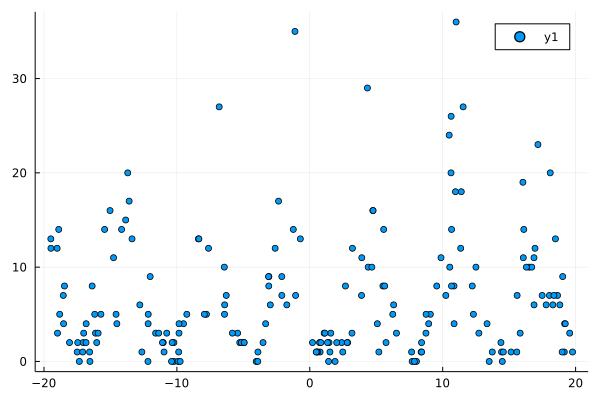

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -575.4670492003991
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.827800 seconds (6.85 M allocations: 416.430 MiB, 2.92% gc time, 98.13% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.2134287050446258, 0.5645487051614401, 0.5167001984816267, 0.5969129410518734, 0.3020980615076916, 0.31918950015988445, 0.5274302869084803, 0.4974544201389152, 0.3384992527974381, 0.5448260997369535  …  0.4972767047449788, 0.23129763160840797, 0.6326934720385411, 0.5905377797681943, 0.5612711641346104, 0.48667353723121237, 0.5031982583098599, 0.4385603332494992, 0.47598735264406844, 0.6592001834740889], θ = [2.988663683144437, 2.435651113242328, 9.783300997741502, 15.54126465442555, 4.9623175157436386, 3.966381821349986, 15.150402652320057, 7.839008798916971, 5.448078215085409, 3.903906239435491  …  4.409505580915775, 9.457872308989677, 3.3877372888528234, 11.177053367770583, 3.41092272603676, 4.413235279848876, 2.9382606997746135, 8.36633289195857, 3.4353824519155163, 3.3785332987019254]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTuple

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -757.7404308194311
[ Info: Training ended after 20 iterations. Total number of iterations 20
  1.979657 seconds (4.33 M allocations: 302.542 MiB, 3.39% gc time, 96.07% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 14.849401063039705) infered by Analytic Variational Inference , (local_vars = (c = [0.4139954322889444, 0.7870348682321698, 0.44843409856519534, 0.5538757831743262, 0.18719322463061558, 0.522613422806076, 0.47675267205622895, 0.412749682221553, 0.20160188541497012, 0.7597402683146902  …  0.7181642149810287, 0.159964658774321, 0.8335775125621638, 0.562227973074455, 0.7865759369078159, 0.6834032715269388, 0.7198337014798151, 0.34909162391290594, 0.711996766300666, 0.8767112610193292], θ = [4.842054254054457, 4.8114533859469475, 10.256298194689393, 15.833595365278521, 6.075815004652607, 5.968171859541767, 15.564858827157295, 8.394437655162813, 6.403585896483559, 6.222765120509812  …  6.670367491139864, 10.771452773538114, 5.784029362525503, 11.408711550429608, 5.7743856768844015, 6.588892591343749, 5.219137036480899, 9.075623515260352, 5.706842808936901, 5.837473150653501], γ = [8.822030081118116, 10.114574752026076, 5.855195000

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

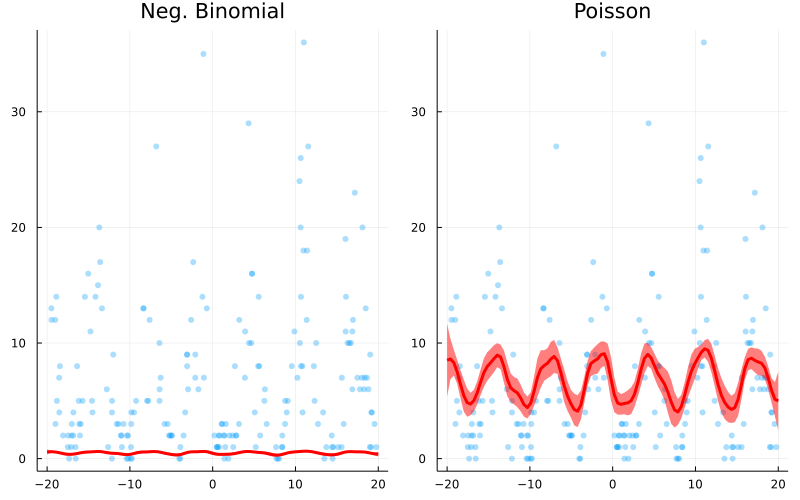

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*